In [1]:
#I have uploaded kaggle.json  manually
from google.colab import files
#files.upload() #upload kaggle.json

In [1]:
!pip install -q kaggle                  
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [2]:
!kaggle datasets download -d wanghaohan/confused-eeg    # Downloading dataset from kaggle

 89% 97.0M/109M [00:02<00:00, 31.3MB/s]
100% 109M/109M [00:02<00:00, 50.3MB/s] 


In [3]:
!unzip /content/confused-eeg.zip                        # unzipping 

Archive:  /content/confused-eeg.zip
  inflating: EEG_data.csv            
  inflating: demographic_info.csv    
  inflating: videos/0.m4v            
  inflating: videos/1.m4v            
  inflating: videos/2.m4v            
  inflating: videos/3.m4v            
  inflating: videos/4.m4v            
  inflating: videos/5.m4v            
  inflating: videos/6.m4v            
  inflating: videos/7.m4v            
  inflating: videos/8.m4v            
  inflating: videos/9.m4v            


In [4]:
import os                                    # created folder to store data Files
os.mkdir('Confused EEG Data')

In [5]:
import shutil
shutil.copy('/content/EEG_data.csv','/content/Confused EEG Data')
shutil.copy('/content/demographic_info.csv','/content/Confused EEG Data')

'/content/Confused EEG Data/demographic_info.csv'

<h2>Introduction</h2>
<p>EEG signal Data gathered from 10 college students collected when they were watching MOOC Videos. There were 20 total videos out of which 10 were confusing (like Quantum Mechanics) and 10 were non-confusing (simple algebra, geometry).
</p>
<p>
The students wore a single channel wireless headset (MindSet) to caputre their eeg signals and reported their confusion on a scale of one to seven.

The MindSet measures the voltage between the electrode resting on forehead and two electrodes (one ground and one reference) each in contact with each ear.
</p>
<p>
These data are collected from ten students, each watching ten videos. Therefore, it can be seen as only 100 data points for these 12000+ rows. If you look at this way, then each data point consists of 120+ rows, which is sampled every 0.5 seconds (so each data point is a one minute video). Signals with higher frequency are reported as the mean value during each 0.5 second.

EEG_data.csv: Contains the EEG data recorded from 10 students

demographic.csv: Contains demographic information for each student

video data : Each video lasts roughly two-minute long, we remove the first 30 seconds and last 30 seconds, only collect the EEG data during the middle 1 minute. </p>
For Detailed Description Visit :https://www.kaggle.com/wanghaohan/confused-eeg


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set(style='darkgrid', color_codes=True)
%matplotlib inline

In [8]:
eeg_df = pd.read_csv('/content/Confused EEG Data/EEG_data.csv')                       #Loading data files
info_df = pd.read_csv('/content/Confused EEG Data/demographic_info.csv')

In [9]:
eeg_df

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [10]:
info_df

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


<h2>Features</h2>
<h4>
<table style="font-size:20px"><tr>
<th>Features</th>	<th>Description</th><th>	Sampling rate</th><th>	Statistic</th>
</tr>
<tr>
<td>Attention </td><td>	Proprietary measure of mental focus</td><td>	1 Hz	</td><td>Mean</td>
</tr>
<tr>
<td>Meditation</td><td>	Proprietary measure of calmness	</td><td>1 Hz</td><td>	Mean</td>
</tr>
<tr>
<td>Raw</td><td>	Raw EEG signal</td><td>	512 Hz</td><td>	Mean</td>
</tr>
<tr>
<td>Delta</td><td>	1–3 Hz of power spectrum</td><td>	8 Hz</td><td>	Mean</td>
</tr>
<tr>
<td>Theta</td><td>	4–7 Hz of power spectrum</td><td>	8 Hz</td><td>	Mean</td>
</tr>
<td>Alpha1</td><td>	Lower 8–11 Hz of power spectrum	</td><td>8 Hz</td><td>	Mean</td>
<tr/>
<tr>
<td>Alpha 2	</td><td>Higher 8–11 Hz of power spectrum</td><td>	8 Hz</td><td>	Mean</td>
</tr>
<tr>
<td>Beta1</td><td>	Lower 12–29 Hz of power spectrum</td><td>	8 Hz</td><td>	Mean</td></tr>
<tr>
<td>Beta 2</td><td>	Higher 12–29 Hz of power spectrum</td><td>	8 Hz</td><td>	Mean</td></tr>
<tr>
<td>Gamma1</td><td>	Lower 30–100 Hz of power spectrum</td><td>	8 Hz</td><td>	Mean</td></tr>
<td>Gamma2</td><td>	Higher 30–100 Hz of power spectrum</td><td>	8 Hz</td><td>	Mean</td></tr>
</table></h4>



2.2. Brainwaves
Neural oscillations can be observed at all times, even when a patient is resting or sleeping. A great analogy is to think of these oscillations as musical notes. Waves with low frequency are like a deeply penetrating drum beat while brainwaves with high frequency are like a high pitched flute. We can see the EEG signals as the partition of a symphony.

• Delta waves (.5 to 3 Hz): Delta brainwaves have the lowest frequency. They are usually generated in deep meditation or dreamless sleep.

• Theta waves (3 to 8 HZ): Theta brainwaves occur most often in sleep and states of reduced consciousness. Theta waves dominate when our body falls asleep. We will see later that those waves are the most important ones during epileptic events.

• Alpha waves (8 to 12 Hz): Alpha brainwaves are dominant when we are quietly thinking and resting.

• Beta waves (12 to 38 Hz): Beta brainwaves dominate our normal waking state of consciousness when attention is directed towards cognitive tasks and the outside world.

The Fourier decomposes the EEG time series into a voltage by frequency spectral graph com- monly called the "power spectrum", with power being the square of the EEG magnitude, and magnitude being the integral average of the amplitude of the EEG signal, measured from (+)peak to (-)peak), across the time sampled, or epoch. This transform helps us visualize the structure behind the signal.




# Merging DataFrames

In [18]:
info_df.rename(columns={'subject ID': 'SubjectID'}, inplace=True)   #merging datframes

data = info_df.merge(eeg_df, on='SubjectID')

In [12]:
data

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9,24,Han Chinese,F,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9,24,Han Chinese,F,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9,24,Han Chinese,F,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9,24,Han Chinese,F,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  int64  
 1    age                12811 non-null  int64  
 2    ethnicity          12811 non-null  object 
 3    gender             12811 non-null  object 
 4   VideoID             12811 non-null  float64
 5   Attention           12811 non-null  float64
 6   Mediation           12811 non-null  float64
 7   Raw                 12811 non-null  float64
 8   Delta               12811 non-null  float64
 9   Theta               12811 non-null  float64
 10  Alpha1              12811 non-null  float64
 11  Alpha2              12811 non-null  float64
 12  Beta1               12811 non-null  float64
 13  Beta2               12811 non-null  float64
 14  Gamma1              12811 non-null  float64
 15  Gamma2              12811 non-null  float64
 16  pred

In [14]:
des=data.describe()

In [15]:
des.T['mean']

SubjectID                  4.487394
 age                      25.409960
VideoID                    4.390602
Attention                 41.313871
Mediation                 47.182656
Raw                       65.570760
Delta                 605785.261728
Theta                 168052.602919
Alpha1                 41384.350636
Alpha2                 33183.393178
Beta1                  24318.368980
Beta2                  38144.330263
Gamma1                 29592.552806
Gamma2                 14415.972992
predefinedlabel            0.479978
user-definedlabeln         0.512606
Name: mean, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83394436d0>,
      dtype=object)

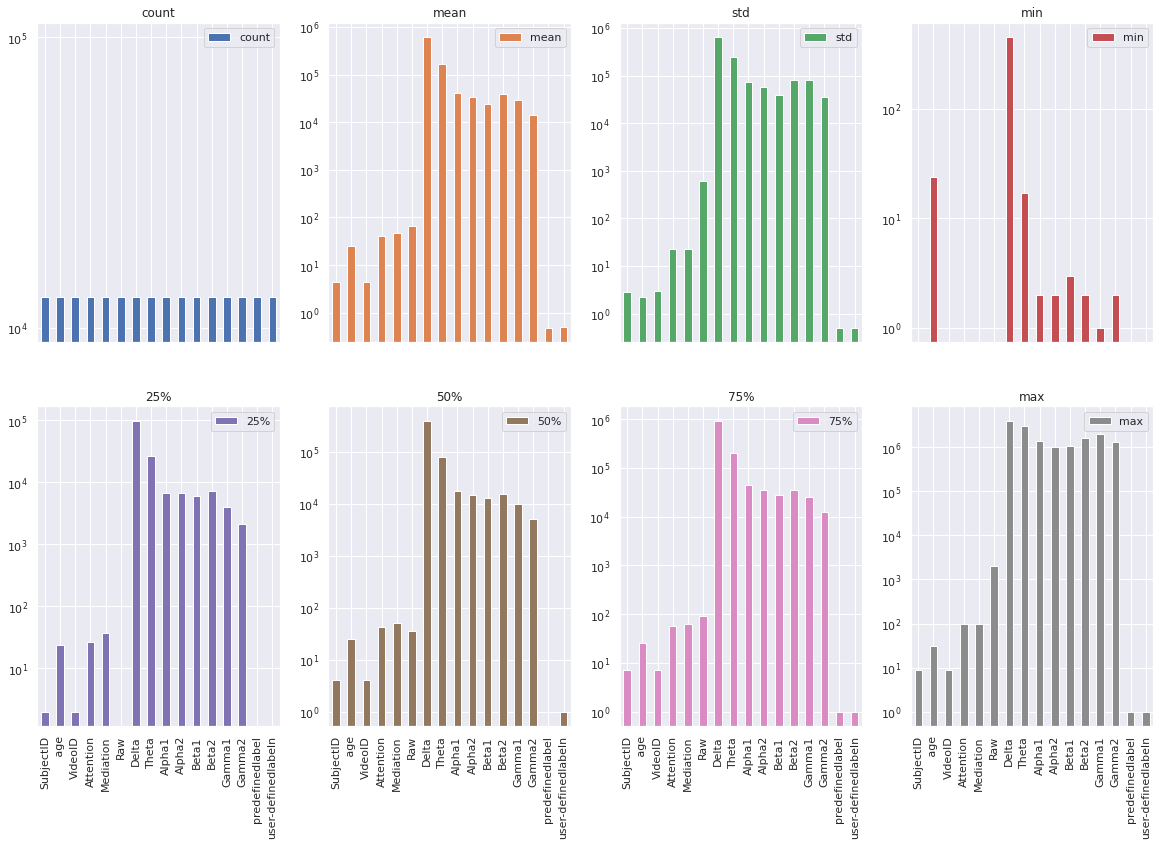

In [16]:
des.T.plot(kind='bar', figsize=(20, 20), subplots=True, layout=(3, 4),logy=True)

<h2>Observations:</h2>
<p>From above graph we are able to get the idea about the distribution of different features in a single frame so we can compare each feature to every other features on various statistical units.

1.Mean of different features lying in the range from (10<sup>-1</sup> to 10<sup>6</sup>) .<br/>
2.Delta and Theta Waves  seems nearly  similar at each front.<br/>
3.Characteristics of all the waves Delta,Theta,Gamma1 and 2,Beta1 and 2 are lying in a close range. <br/>
4.Wave Features got higher values comapre to all other features. 


# Cleaning

In [19]:
data.columns

Index(['SubjectID', ' age', ' ethnicity', ' gender', 'VideoID', 'Attention',
       'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1',
       'Beta2', 'Gamma1', 'Gamma2', 'predefinedlabel', 'user-definedlabeln'],
      dtype='object')

In [20]:
data.rename(columns={' age': 'Age', ' ethnicity': 'Ethnicity', ' gender': 'Gender', 'user-definedlabeln': 'Label'}, inplace=True)

In [21]:
data['Label'] = data['Label'].astype(np.int)

In [22]:
data

,SubjectID,Age,Ethnicity,Gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,Label
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9,24,Han Chinese,F,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0
12807,9,24,Han Chinese,F,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0
12808,9,24,Han Chinese,F,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0
12809,9,24,Han Chinese,F,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0


In [23]:
print("Missing values:", data.isna().sum().sum())

Missing values: 0


# Encoding Features

In [24]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [25]:
data['Gender'] = data['Gender'].apply(lambda x: 1  if x == 'M' else 0)

In [26]:
data['Ethnicity'].unique()

array(['Han Chinese', 'English', 'Bengali'], dtype=object)

In [27]:
ethnicity_dummies = pd.get_dummies(data['Ethnicity'])
data = pd.concat([data, ethnicity_dummies], axis=1)
data = data.drop('Ethnicity', axis=1)

In [28]:
data

,SubjectID,Age,Gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,Label,Bengali,English,Han Chinese
0,0,25,1,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0,0,0,1
1,0,25,1,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0,0,0,1
2,0,25,1,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0,0,0,1
3,0,25,1,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0,0,0,1
4,0,25,1,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9,24,0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0,0,0,1
12807,9,24,0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0,0,0,1
12808,9,24,0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0,0,0,1
12809,9,24,0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0,0,0,1


In [29]:
print("Non-numeric columns:", len(data.select_dtypes('object').columns))

Non-numeric columns: 0


# EDA

In [30]:
data.dtypes

SubjectID            int64
Age                  int64
Gender               int64
VideoID            float64
Attention          float64
Mediation          float64
Raw                float64
Delta              float64
Theta              float64
Alpha1             float64
Alpha2             float64
Beta1              float64
Beta2              float64
Gamma1             float64
Gamma2             float64
predefinedlabel    float64
Label                int64
Bengali              uint8
English              uint8
Han Chinese          uint8
dtype: object

In [31]:
features = data.copy()
num_features = len(features.columns)

print("Features:", num_features)

Features: 20


In [32]:
categorical_features = ['Age', 'Gender', 'Bengali', 'English', 'Han Chinese']
continuous_features = ['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2','Label',]

print("Categorical Features:", len(categorical_features))
print("Continuous Features:", len(continuous_features))

Categorical Features: 5
Continuous Features: 12


## Univariate Analysis

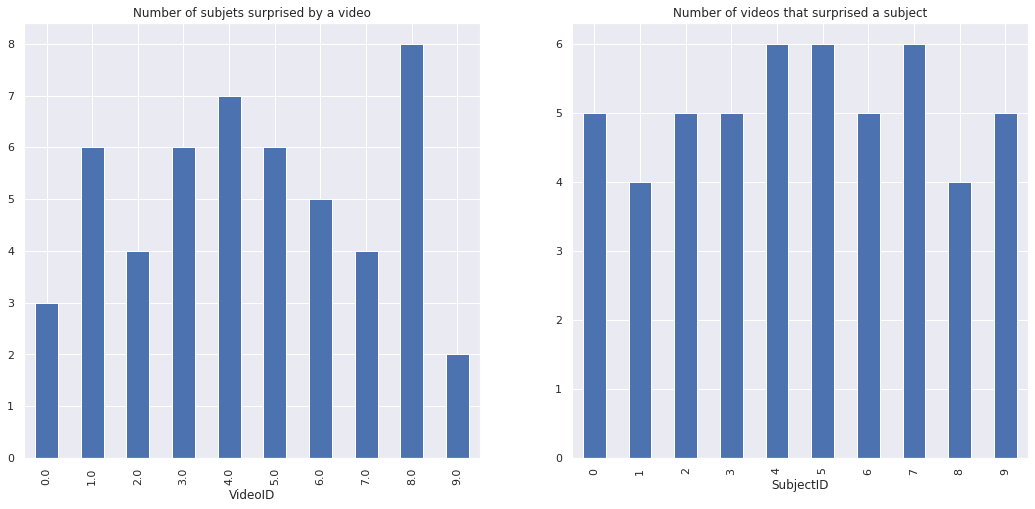

In [33]:
data_resume = data.groupby(['SubjectID', 'VideoID'])['Label'].agg(lambda x: sum(x) > 0).unstack("VideoID")
data_resume
fig = plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
data_resume.apply(sum).plot(kind='bar', title='Number of subjets surprised by a video')
plt.subplot(1, 2, 2)
data_resume.apply(sum, axis=1).plot(kind='bar', title="Number of videos that surprised a subject")
plt.show()

<p>It looks like that movie #8 is the one that most confusion generates. Users #4, #5, #7 are the most confused ones</p>

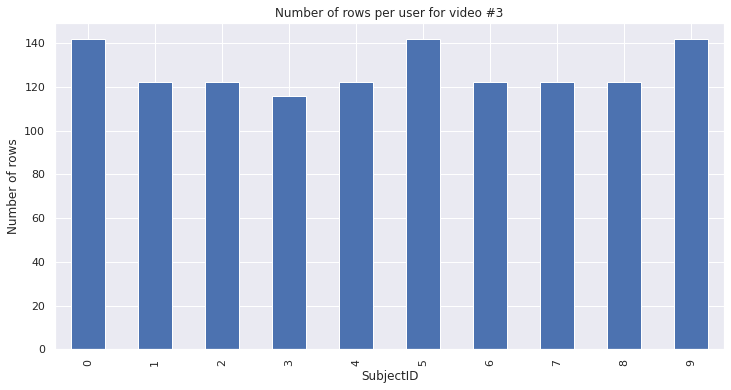

In [34]:
data.groupby(['SubjectID', 'VideoID']).size().loc[(slice(None), 2)].plot(kind='bar', figsize=(12,6))
plt.title("Number of rows per user for video #3")
plt.ylabel("Number of rows")
plt.show()

In [35]:
data = data.drop(['SubjectID', 'VideoID', 'predefinedlabel'], axis=1)

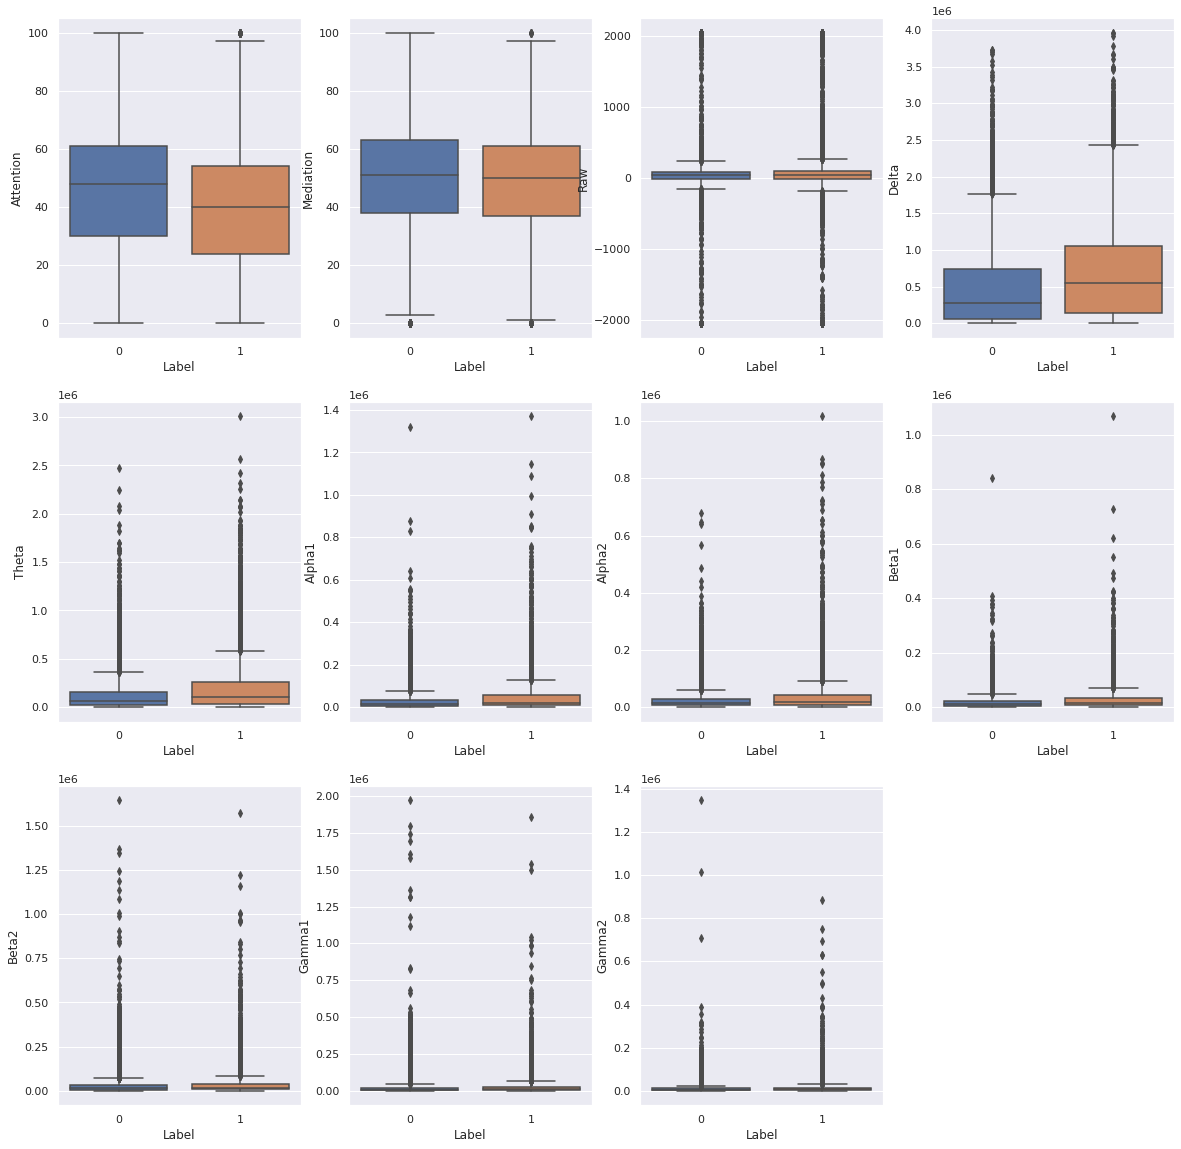

In [36]:

plt.figure(figsize=(20,20))
for k in range(0,11) :
  if k!=12:   
     plt.subplot(3,4,k+1)
     sns.boxplot(x="Label",y=continuous_features[k],data=data)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

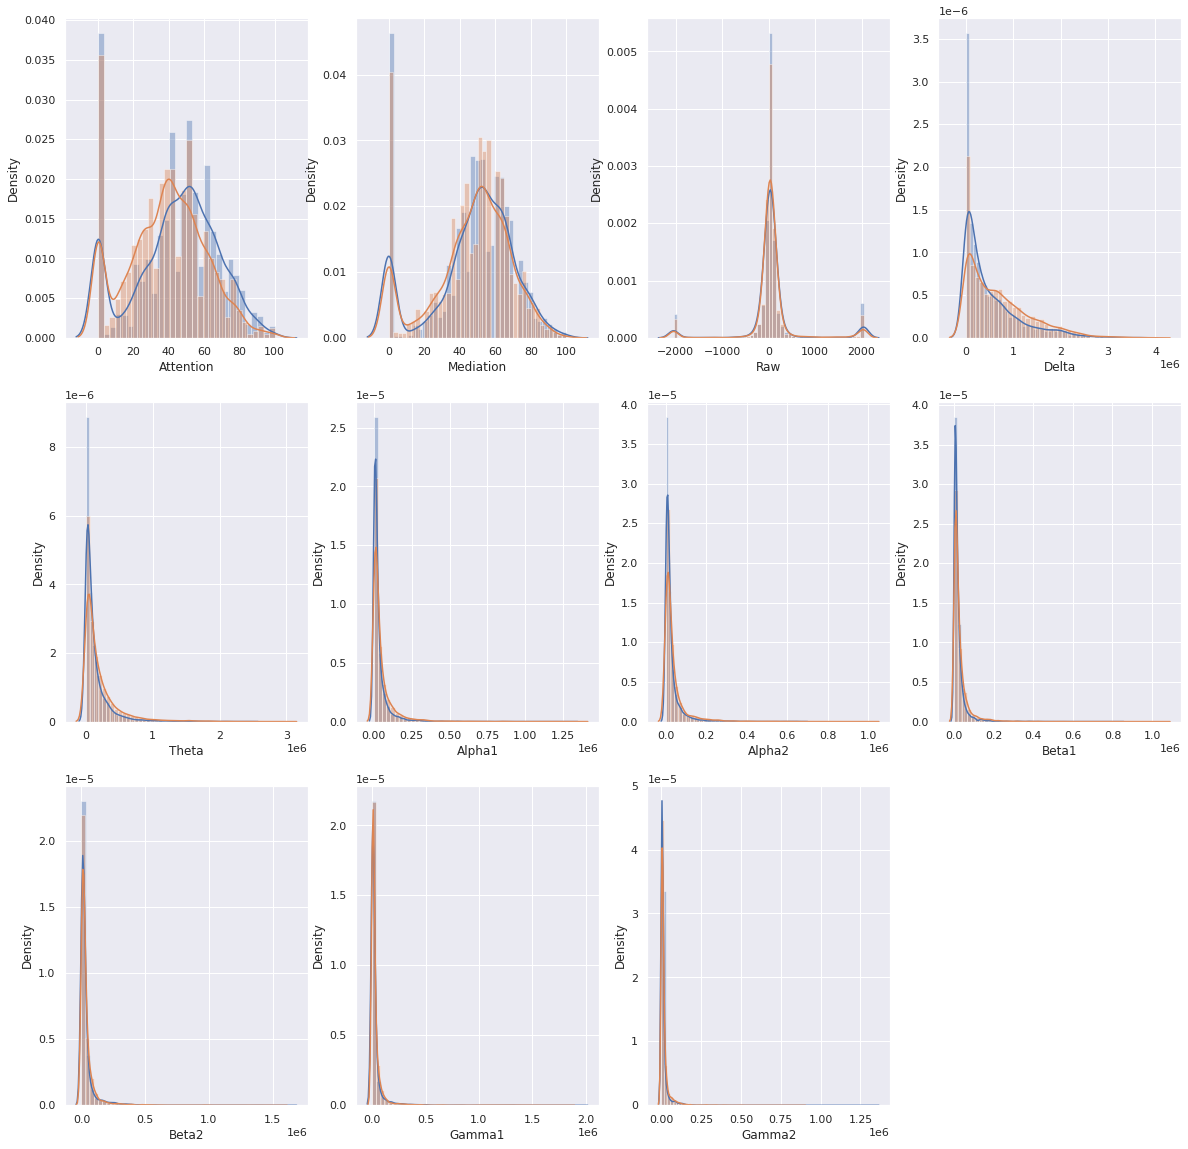

In [37]:
plt.figure(figsize=(20,20))
for k in range(0,11) :
  if k!=12:   
     plt.subplot(3,4,k+1)
     #sns.distplot(x="Label",y=continuous_features[k],data=data)
     sns.distplot(data[data["Label"]==0][continuous_features[k]])
     sns.distplot(data[data["Label"]==1][continuous_features[k]])


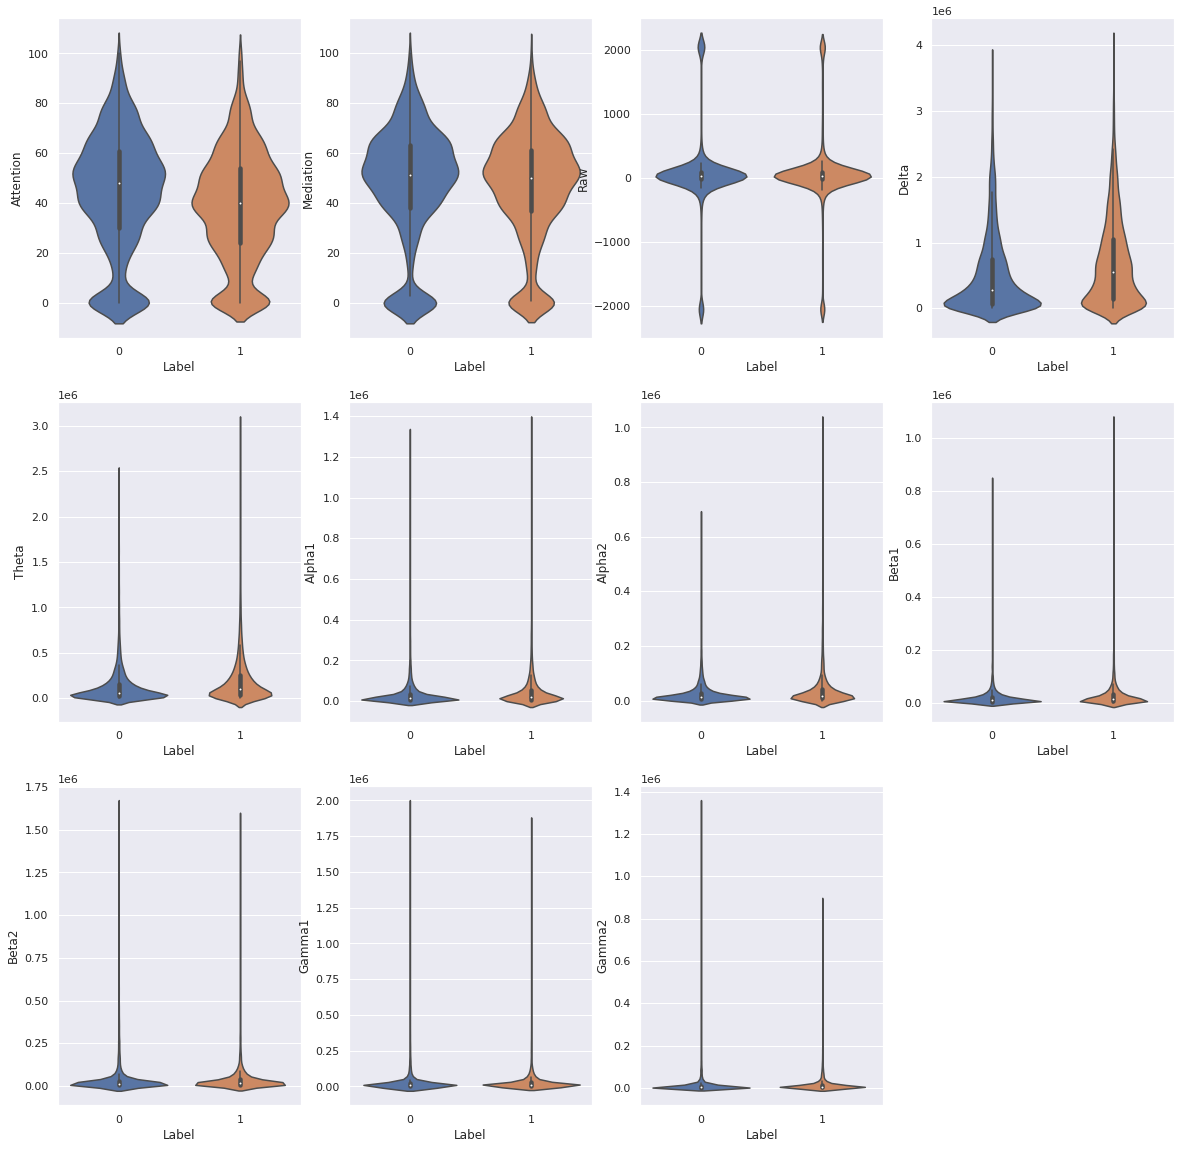

In [ ]:

plt.figure(figsize=(20,20))
for k in range(0,11) :
  if k!=12:   
     plt.subplot(3,4,k+1)
     sns.violinplot(x="Label",y=continuous_features[k],data=data)

In [ ]:
ut

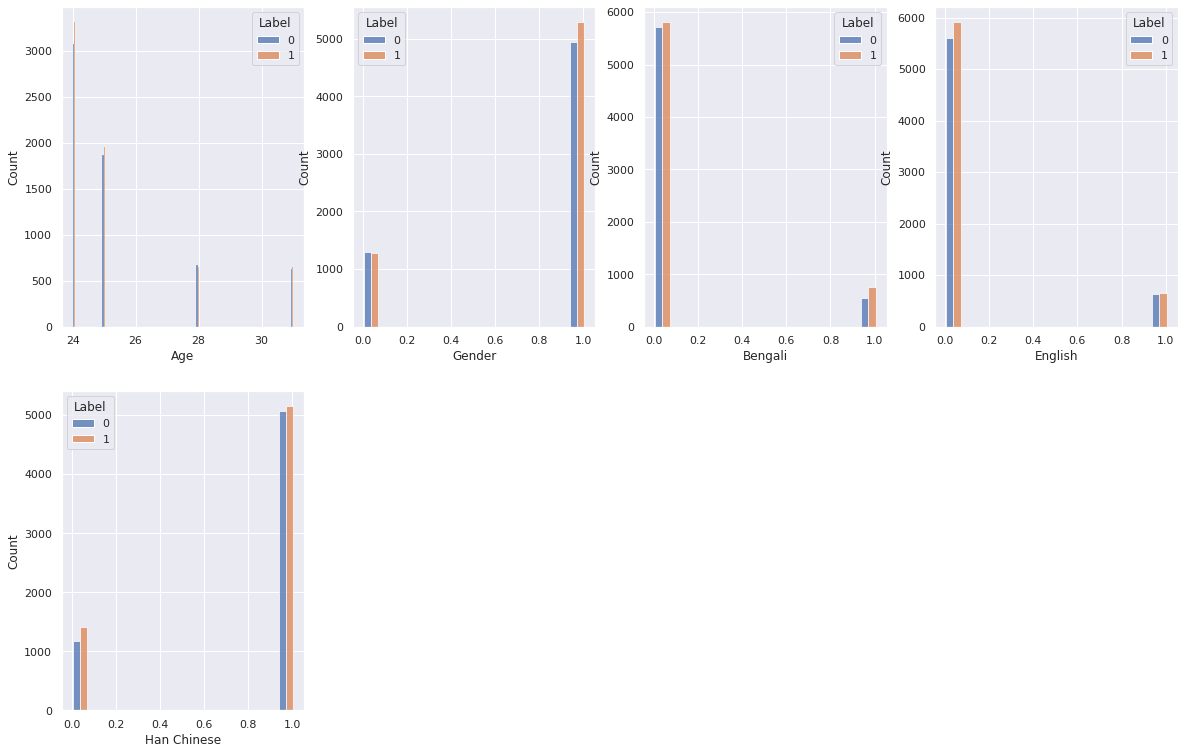

In [ ]:
plt.figure(figsize=(20,20))
for k in range(0,5) :
  if k!=12:   
     plt.subplot(3,4,k+1)
     #sns.violinplot(x="Label",y=categorical_features[k],data=data)
     sns.histplot(data=data,x=categorical_features[k],hue="Label",shrink=.99,multiple="dodge")

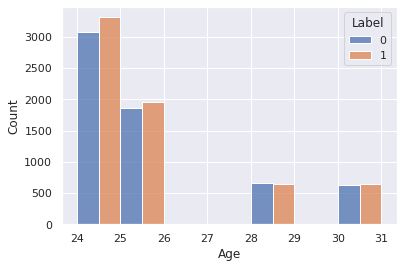

In [ ]:
sns.histplot(data=data,x=data["Age"],hue=data["Label"],binwidth=1,multiple="dodge")
#sns.histplot(data["Label"])

<h2> Observations </h2>
<p>From the above univariate analysis we can conclude following points : </p>
<p>1.All the features are overlapping too much ,so we can not say anything on the contribution of Individual features in classification.</br>
2. Wave Features Theta,Alpha1,Alpha2,Beta1 have got high peaked distributed for 0 Class level in compare to Class Level 1.</br>
3.Distribution of Theta,Alpha1,Alpha2,Beta1 has got more spread for class 0 in compare to class 1.


 


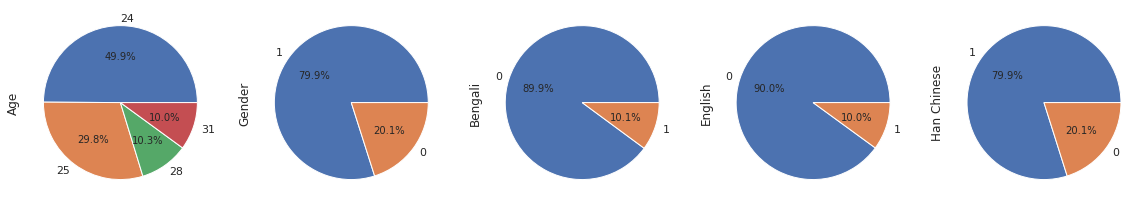

In [ ]:
plt.figure(figsize=(20, 5))
for feature in categorical_features:
    plt.subplot(1, 5, categorical_features.index(feature) + 1)
    features[feature].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

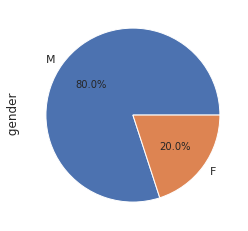

In [ ]:
info_df[' gender'].value_counts().plot(kind='pie',autopct='%.1f%%')

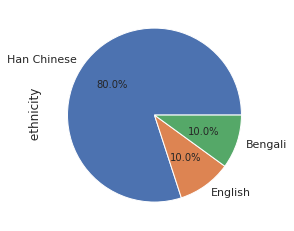

In [ ]:
info_df[' ethnicity'].value_counts().plot(kind='pie',autopct='%.1f%%')

In [ ]:
   d1= data[data['Label']==0]

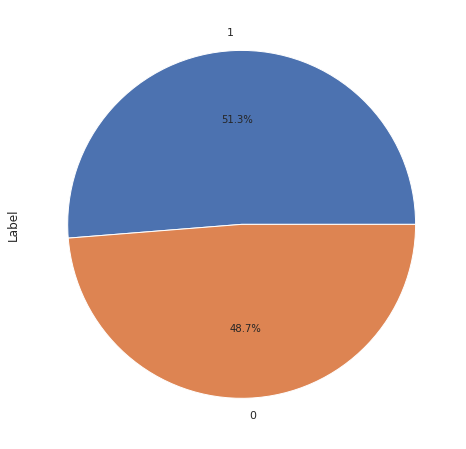

In [ ]:
plt.figure(figsize=(8, 8))
data['Label'].value_counts().plot(kind='pe', autopct='%.1f%%')
plt.show()

<h2> Observations </h2>
1.Dataset is balanced enough 48.07% are negative class level and 51.3% are postivie class level.<br/>
2.There are less number of females in compare to males.<br/>
3.Nearly 50% of peoples' age is 24 .<br/>
4.Nearly 80% peoples belongs to Hans chinese ethnicity<br/>

## Multivariate Analysis

In [ ]:
len(data[data["Label"]==1])

6567

In [ ]:
features

,Age,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0,0,1
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0,0,1
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0,0,1
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0,0,1
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0,0,0,1
12807,24,0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0,0,0,1
12808,24,0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0,0,0,1
12809,24,0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0,0,0,1


In [ ]:
ft=features[continuous_features]

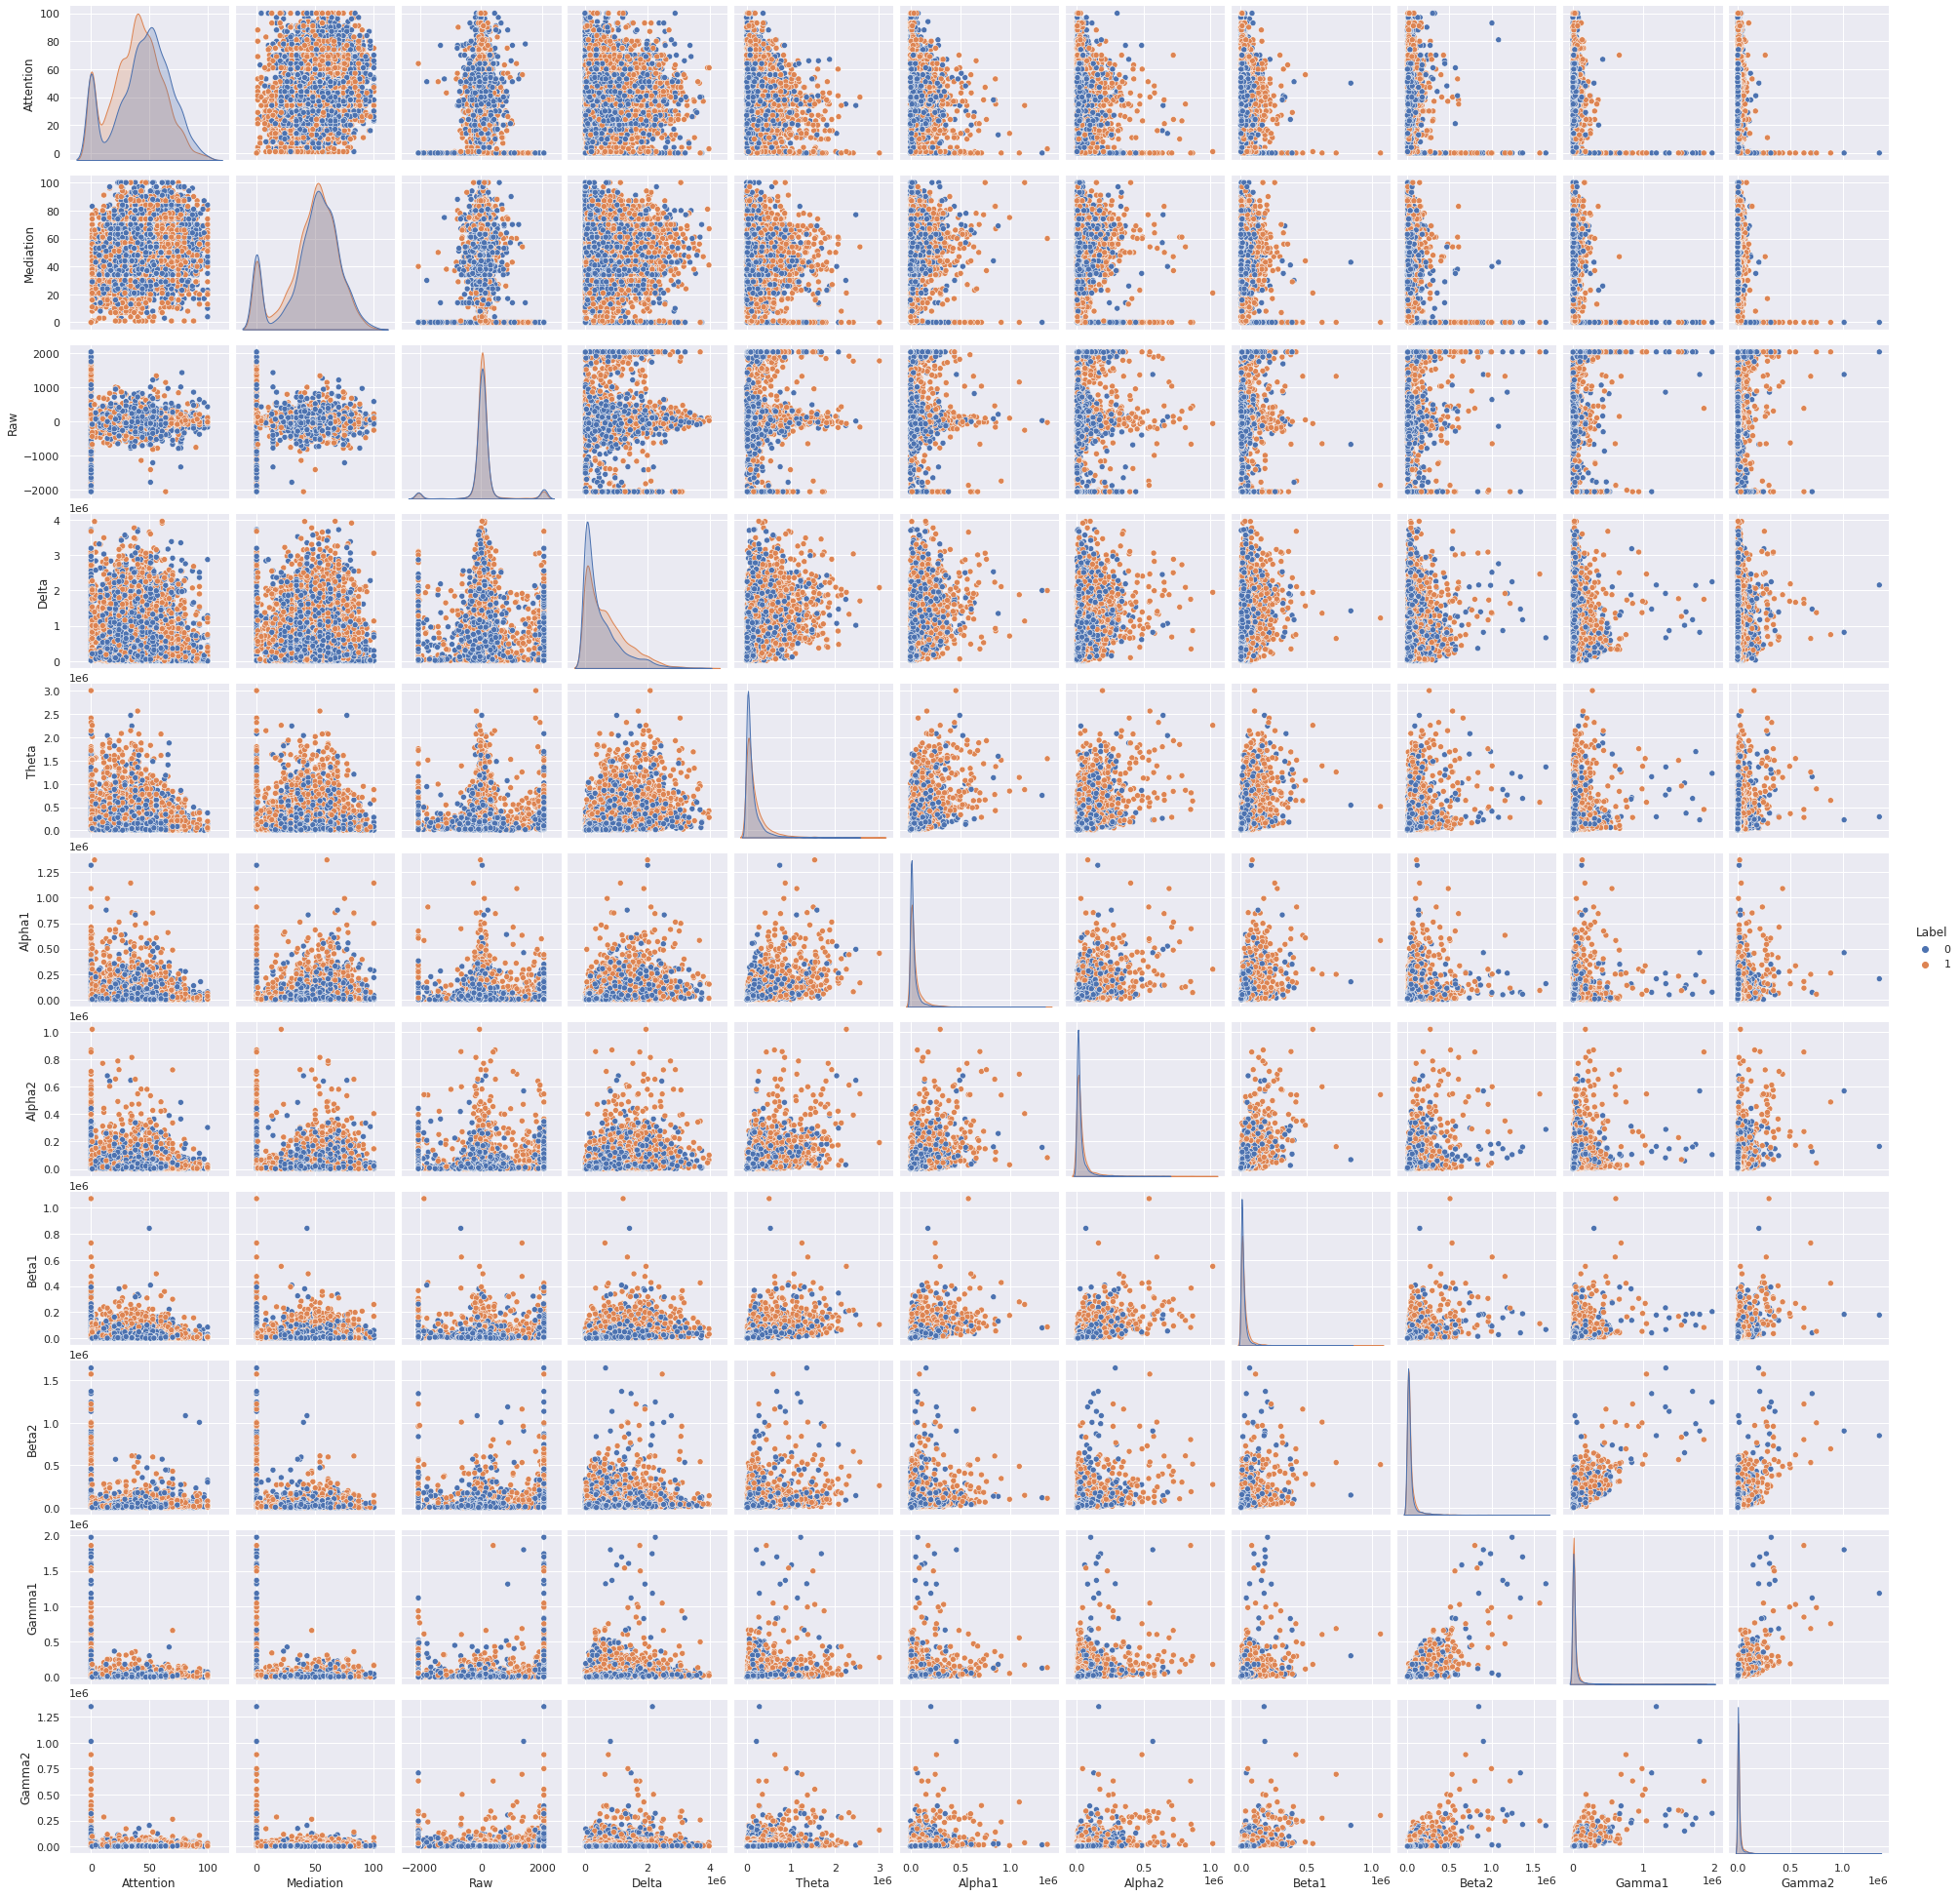

In [ ]:
sns.pairplot(ft,hue="Label")

<h2>Observation </h2>
<p>From the above pair we conclude that</p>
1.Different combination of features are forming clusters but they are overlapping .<br/>
2.Combination of Delta,theta,alpha1,and alpha2 are contributing good enough in classification.<br/>
3.(Attention,Delta),(Meditaion,delta),(Attention ,Meditaion) are significantly good combinations in comapre to all others.

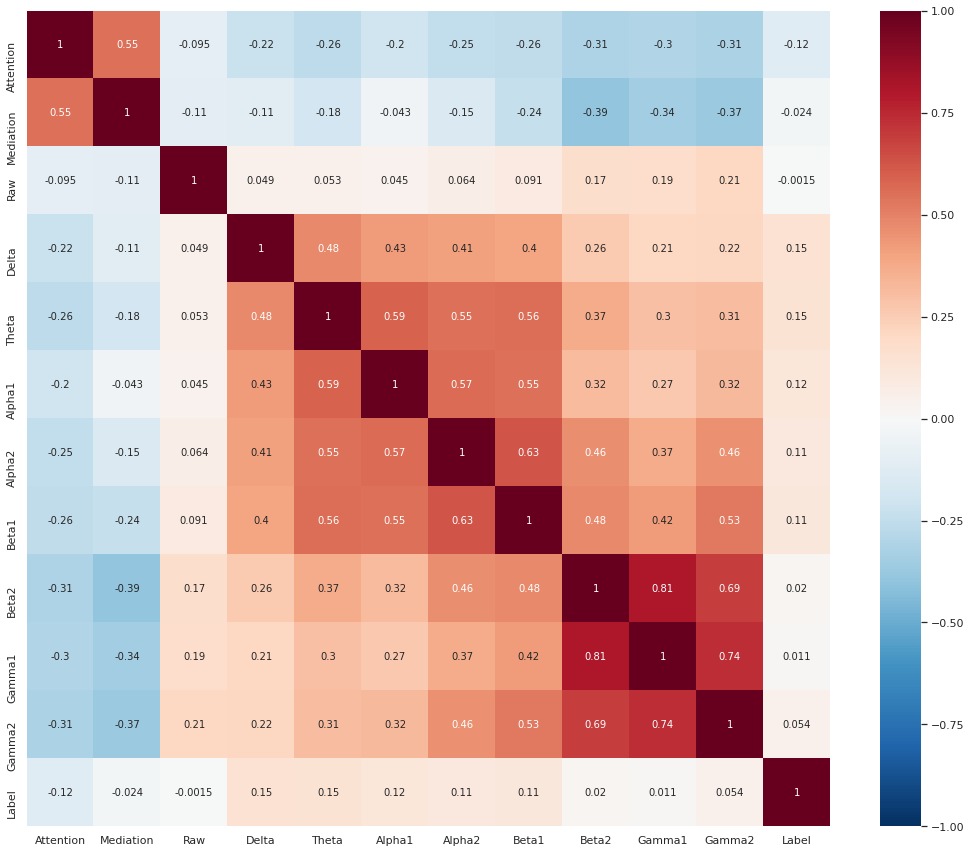

In [38]:
corr = data[continuous_features].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='RdBu_r')
plt.show()

<h2> Observation </h2>
<p>
1.Some wave features are corelated to each other significantly.<br/>
2.Delta,Theta,Aplha1,Alpha2 are showing significant postive corelation.<br/>
3.Beta1 beta2,gamma1,gamma2 are also showing significant corelation.<br/>
</p>

<h2>Conclusion </h2>
1.Wave features are co-related to each other significantly.<br/>
2.Different combinations of features are contributing better in compare to Individual features.<br/> 
3.Dataset is balanced.<br/> 
4.Combination of wave features to Attention,and meditation is important.